# Stock Price Prediction using LSTM by `Mr. Harshit Dawar`

## Importing the required Packages!

In [1]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Dataset

In [20]:
data = pd.read_csv("stockdata.csv")

In [3]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [4]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [5]:
data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,48.344296,48.717212,47.956827,48.352246,9.230517e+06
std,10.389108,10.458485,10.304082,10.391867,4.382209e+06
min,26.535000,26.820000,26.260000,26.605000,2.215418e+06
25%,38.372500,38.690650,38.087750,38.355000,6.661026e+06
50%,53.520000,53.995000,53.180000,53.540000,8.138313e+06
75%,57.270000,57.735000,56.850000,57.360000,1.059388e+07
max,64.850000,64.870000,64.180000,64.570000,5.345479e+07


### Using the wrong way to predict the stock prices(this way is most followed way, which is actually wrong)!


In [6]:
# Taking only high data for demonstration purpose!
timeSeries = data["high"].values.reshape(-1, 1)

In [7]:
timeSeries.shape

(1259, 1)

In [8]:
# Normalizing the data (Fitting only half series & transforming the complete series)
# This is the use case & difference b/w using fit_transofrm() & using fit & transform seperately
scaler = StandardScaler().fit(timeSeries[: timeSeries.shape[0] // 2])
timeSeries = scaler.transform(timeSeries)

In [9]:
timeSeries.shape

(1259, 1)

In [10]:
timeSeriesData = []
forecast = []
sequenceLength = 15
Dimesnsion = timeSeries.shape[1]

for sequence in range(len(timeSeries) - sequenceLength):
    timeSeriesData.append(
        timeSeries[sequence : sequence + sequenceLength]
    )
    forecast.append(
        timeSeries[sequence + sequenceLength]
    )
    
timeSeriesData, forecast = np.array(timeSeriesData), np.array(forecast)

In [11]:
timeSeriesData.shape

(1244, 15, 1)

In [12]:
# Just playing with shapes (This cell has no relation with the project!)
timeSeriesData.reshape(-1, sequenceLength, 2).shape

(622, 15, 2)

In [13]:
inputShape = Input(shape = (sequenceLength, Dimesnsion))
LayerStack = LSTM(9)(inputShape)
LayerStack = Dense(1)(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.summary()

LSTMModel.compile(optimizer="adam", loss="mse")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 9)                 396       
_________________________________________________________________
dense (Dense)                (None, 1)                 10        
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [14]:
limit = timeSeriesData.shape[0] // 2
trainedModel = LSTMModel.fit(timeSeriesData[ : limit],
                             forecast[ : limit],
                             epochs = 200,
                             validation_data = (timeSeriesData[ limit : ],
                                                forecast[ limit : ]
                             )
                            )

Train on 622 samples, validate on 622 samples
Epoch 1/200
622/622 [==============================] - 13s 20ms/sample - loss: 0.5825 - val_loss: 3.2017
Epoch 2/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.3739 - val_loss: 2.2967
Epoch 3/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.2525 - val_loss: 1.6913
Epoch 4/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.1912 - val_loss: 1.3221
Epoch 5/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.1561 - val_loss: 1.1024
Epoch 6/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.1336 - val_loss: 0.9592
Epoch 7/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.1162 - val_loss: 0.8568
Epoch 8/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0992 - val_loss: 0.7926
Epoch 9/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0842 - val_loss: 0.7396
Epoch 10/200
622/622 [===

622/622 [==============================] - 1s 2ms/sample - loss: 0.0068 - val_loss: 0.0387
Epoch 80/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0067 - val_loss: 0.0387
Epoch 81/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0067 - val_loss: 0.0384
Epoch 82/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0067 - val_loss: 0.0385
Epoch 83/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0067 - val_loss: 0.0383
Epoch 84/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0068 - val_loss: 0.0385
Epoch 85/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0066 - val_loss: 0.0380
Epoch 86/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0066 - val_loss: 0.0378
Epoch 87/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0066 - val_loss: 0.0375
Epoch 88/200
622/622 [==============================] - 1s 1ms/sample - loss:

622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0304
Epoch 158/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0053 - val_loss: 0.0294
Epoch 159/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0052 - val_loss: 0.0293
Epoch 160/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0052 - val_loss: 0.0293
Epoch 161/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0291
Epoch 162/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0289
Epoch 163/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0287
Epoch 164/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0289
Epoch 165/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0289
Epoch 166/200
622/622 [==============================] - 1s 1ms/sampl

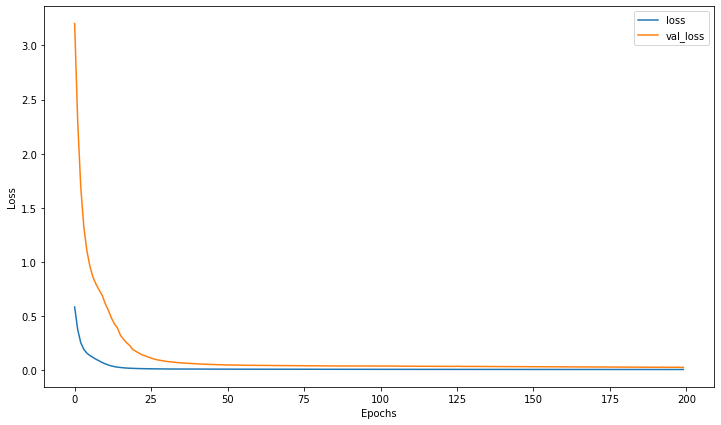

In [15]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

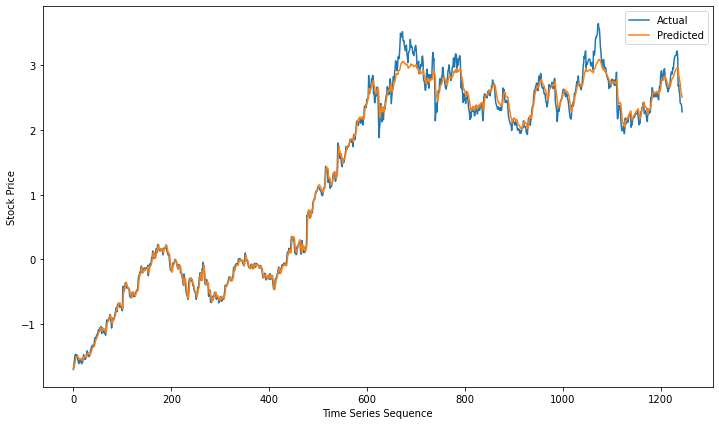

In [16]:
# Wrong forecast approach
plt.figure(figsize = (12, 7))
plt.plot(forecast, label = "Actual")
plt.plot(LSTMModel.predict(timeSeriesData), label = "Predicted")
plt.xlabel("Time Series Sequence")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

***Above graph looks very promising, but in reality this approach never helps!***

In [17]:
# Right Forecast Approach
predictions = []
last_value = timeSeriesData[0]

while len(predictions) < len(forecast):
        temp = LSTMModel.predict(last_value.reshape(1, sequenceLength, 1))[0, 0]
        predictions.append(temp)
        
        last_value = np.roll(last_value, -1)
        last_value[-1] = temp

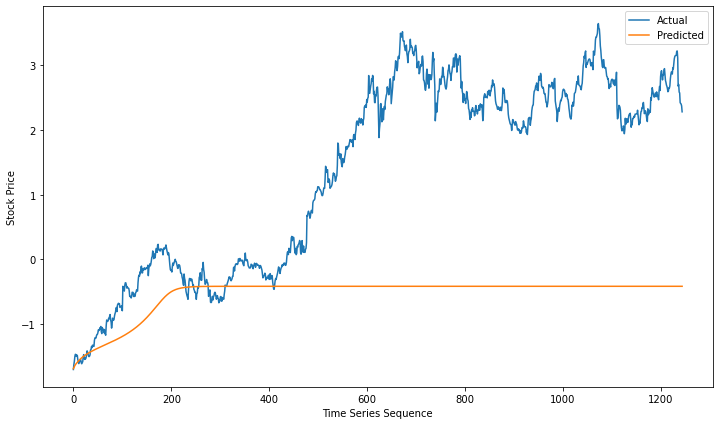

In [18]:
plt.figure(figsize = (12, 7))
plt.plot(forecast, label = "Actual")
plt.plot(predictions, label = "Predicted")
plt.xlabel("Time Series Sequence")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Using the Righ Approach for dealing with Stock Data
* In realtiy, instead of stock price, stock return has to be calculated i.e. (final price - initial price) / initial price

In [21]:
# Shifting everything up by 1 position.
data["previousHigh"] = data.high.shift(1)
data.head()

,date,open,high,low,close,volume,Name,previousHigh
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.325
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.260
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.275
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,28.230


In [22]:
data["Return"] = (data.high - data.previousHigh) / data.previousHigh

In [23]:
data.head()

,date,open,high,low,close,volume,Name,previousHigh,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.325,-0.002295
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.260,0.000531
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.275,-0.001592
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,28.230,-0.011513


(array([  2.,   5.,  15., 173., 744., 282.,  31.,   4.,   0.,   2.]),
 array([-0.06408935, -0.05003766, -0.03598597, -0.02193429, -0.0078826 ,
         0.00616909,  0.02022078,  0.03427246,  0.04832415,  0.06237584,
         0.07642753]),
 <BarContainer object of 10 artists>)

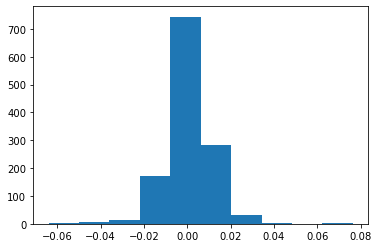

In [24]:
plt.figure(figsize = (15))
plt.hist(data.Return)
plt.show()